**Business Objective**

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#--- google drive refs
m_kstrRoot = '/content/drive/My Drive/Colab Notebooks/fourthbrain.ai/'
m_kstrRoot = m_kstrRoot + 'capstone/'
m_kstrData = m_kstrRoot + 'data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# pre-reqs

In [129]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.2
import numpy as np                #--- numpy==1.23.5             
import sklearn                    #--- scikit-learn >=1.2.0            
import pickle                     #--- pickle >= 4.0
            

def persistScaler(scalarObj):
  #--- persist the std scaler
  with open(m_kstrData + "std_scaler_colab.pkl", 'wb') as filPkl:
      pickle.dump(scalarObj, filPkl)

def persistLogRegr_model(modelObj):
  with open(m_kstrData + "lgr_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistSVM_model(modelObj):
  with open(m_kstrData + "svm_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)

def persistGBC_model(modelObj):
  with open(m_kstrData + "gbc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistEnc_model(modelObj):
  with open(m_kstrData + "enc_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def persistKMeans_model(modelObj):
  with open(m_kstrData + "kmn_model_colab.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl)


def prereq_createCondaEnv():

  try:
    print("INFO:  activating conda env_capstone ...")
    !conda activate env_capstone
  except CommandNotFoundError:
    #--- possibly, conda is not initialized?
    print("EXCEPTION: ... CommandNotFoundError")
    !conda init bash
    !conda create --name env_capstone python=3.10.8
  except excE:
    print("EXCEPTION: ... ", excE)
  finally:
    !conda activate env_capstone
    
'''    
  try:
    print("INFO:  creating new conda env_capstone ...")
    !conda create --name env_capstone python=3.10.8
  except:
    #--- possibly the env already exists?

 
    !conda create --name env_capstone python=3.10.8
'''


def prereq_getCurrVersions():
  print("INFO:  get current dep versions ...")
  print("python.v: ")                               #--- python 3.10.8
  !python -V

  print("pd.v: ", pd.__version__)                   #--- pandas 1.5.2
  print("np.v: ", np.__version__)                   #--- numpy 1.24.1
  print("sk.v: ", sklearn.__version__)              #--- sklearn >=0.0.post1
  #print("skl.v: ", scikit-learn.__version__)        #--- scikit-learn ==1.2.0
  print("pkl.v: ", pickle.format_version)           #--- pickle >= 4.0


def prereq_upgradePython():
  print("INFO:  upgrading python ...")
  !wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
  !bash ./py310.sh -b -f -p /usr/local
  !python -m ipykernel install --name "py310" --user


def prereq_upgradeDeps():
  #--- optional exec:  ensure minimum libraries and versions
  print("INFO:  upgrading dependencies ...")
  !pip3 install -U pandas>=1.5.3
  !pip3 install -U numpy>=1.24.1

  #!pip3 uninstall scikit-learn -y
  #!pip3 install -U scikit-learn==1.2.0
  #!pip3 install -U sklearn==0.0.post1
  !pip3 install -U sklearn==1.2.0
  
  !pip install -U pickle>=4.0
  #--- optional exec:  determine default colab libraries and versions






In [ ]:

#--- get current versions
prereq_getCurrVersions()

INFO:  get current dep versions ...
python.v: 
Python 3.10.6
pd.v:  1.3.5
np.v:  1.21.6
sk.v:  1.0.2
pkl.v:  4.0


In [ ]:
#--- upgrade python to 3.10.6
prereq_upgradePython()

In [130]:
#--- upgrade libraries
#!pip list outdated
!pip install --upgrade pandas==1.5.2 numpy==1.23.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#sklearn.__version__

/bin/bash: sklearn.__version__: command not found


# Fetching Train and Test Files

In [ ]:
!pip install sklearn==0.0.post1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/fourthbrain

dog_dataset				Train_Beneficiarydata-1542865627584.csv
Test-1542969243754.csv			Train_Inpatientdata-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv	Train_Outpatientdata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv	tweets.csv.gz
Test_Outpatientdata-1542969243754.csv	twitter-mask.png
Train-1542865627584.csv


In [ ]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'

#--- IM: override
pathname = m_kstrData

train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

# Data Engineering on Beneficiary Dataset

In [ ]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [ ]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [ ]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [ ]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

## Person's Age on Train dataset

In [ ]:
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

In [ ]:
train_beneficiary_df['Age'].isna().sum(), train_beneficiary_df.shape[0]

(137135, 138556)

**Take-away message**

There are 1421 beneficiaries still alive and we need to calculate their age as well. 

In [ ]:
train_beneficiary_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

**Take-away message**
Beneficiary data was last recorded on 2009-12-01, so we can calculate age of people that are still alive based on this date. 

In [ ]:
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)

In [ ]:
train_beneficiary_df.Age.isna().sum()

0

## Person's Age on Test dataset

In [ ]:
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

In [ ]:
test_beneficiary_df['Age'].isna().sum(), test_beneficiary_df.shape[0]


(63394, 63968)

In [ ]:
63968 - 63394 

574

**Take-away message**

In the test dataset, there are 574 beneficiaries that are still alive. We'll calculate their age based on the last recorded date. 

In [ ]:
test_beneficiary_df['DOD'].max()


Timestamp('2009-12-01 00:00:00')

In [ ]:
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


In [ ]:
test_beneficiary_df.Age.isna().sum()


0

## Add dead flag column

In [ ]:
train_beneficiary_df.shape

(138556, 26)

In [ ]:
train_beneficiary_df['DOD'].isna().sum(), train_beneficiary_df['DOD'].notna().sum()

(137135, 1421)

In [ ]:
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [ ]:
train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64

In [ ]:
test_beneficiary_df.shape

(63968, 26)

In [ ]:
test_beneficiary_df['DOD'].isna().sum(), test_beneficiary_df['DOD'].notna().sum()


(63394, 574)

In [ ]:
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [ ]:
test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

# Data Engineering for in-patient dataset

**Calculating Admitted Days**

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [ ]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [ ]:
train_inpatient_df['AdmittedDays'].isna().sum()

0

In [ ]:
test_inpatient_df['AdmittedDays'].isna().sum()

0

# Merging Inpatient and Outpatient dataset

In [ ]:
key_columns_to_merge = list(train_outpatient_df.columns)
key_columns_to_merge

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [ ]:
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge, how='outer')
train_merged_patient_data.shape

(558211, 31)

In [ ]:
key_columns_to_merge_test = list(test_outpatient_df.columns)
key_columns_to_merge_test

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [ ]:
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')
test_merged_patient_data.shape

(135392, 31)

# Merging Beneficiary with All-patient data

In [ ]:
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')
trainAllPatientDetailsData.shape

(558211, 57)

In [ ]:
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')
testAllPatientDetailsData.shape

(135392, 57)

# Merging all-patients data with provider data with fraud label

In [ ]:
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')
trainAllPatientDetailsProvider.shape

(558211, 58)

In [ ]:
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')
testAllPatientDetailsProvider.shape

(135392, 57)

In [ ]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [ ]:
train_columns = trainAllPatientDetailsProvider.columns

In [ ]:
[test for test in train_columns if test not in test_columns]

['PotentialFraud']

In [ ]:
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Missing value information in final dataset

In [ ]:
trainAllPatientDetailsProvider.isna().sum()*100/len(trainAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

In [ ]:
testAllPatientDetailsProvider.isna().sum()*100/len(testAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

# Feature Engineering

In [ ]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


In [ ]:
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
                     'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                     'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                     'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'ClmAdmitDiagnosisCode', 'AdmissionDt',
                     'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
                     'State', 'County']

train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
train_final.shape

(558211, 27)

In [ ]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [ ]:
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final.shape

(135392, 26)

In [ ]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [ ]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')

In [ ]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## One-hot encoding

In [ ]:
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [ ]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [ ]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [ ]:
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)
test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [ ]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [ ]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [ ]:
test_final['RenalDiseaseIndicator'].value_counts()

0    109143
1     26249
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

In [ ]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [ ]:
test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [ ]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

In [ ]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## Check for correlated columns

In [ ]:
train_final.shape

(558211, 29)

In [ ]:
cor = train_final.corr() 

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
test_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

## New features for better predictions

In [ ]:
train_final['InscClaimReimbursement_ProviderAvg'] = train_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')
test_final['InscClaimReimbursement_ProviderAvg'] = test_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')

In [ ]:
train_final['DeductibleAmtPaid_ProviderAvg'] = train_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')
test_final['DeductibleAmtPaid_ProviderAvg'] = test_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')

In [ ]:
train_final['IPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')
test_final['IPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')

In [ ]:
train_final['IPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')
test_final['IPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')

In [ ]:
train_final['OPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')
test_final['OPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')

In [ ]:
train_final['OPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')
test_final['OPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')

# Train & validation split

In [ ]:
train_final_groupby = train_final.groupby(['Provider', 'PotentialFraud'], as_index = False).agg('sum')

train_final_groupby.shape

(5410, 34)

In [ ]:
test_final_groupby = test_final.groupby(['Provider'], as_index=False).agg('sum')
test_final_groupby.shape

(1353, 33)

In [ ]:
test_final_groupby.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot', 'Gender_2', 'Race_2',
       'Race_3', 'Race_5', 'InscClaimReimbursement_ProviderAvg',
       'DeductibleAmtPaid_ProviderAvg', 'IPAnnualReimbursementAmt_ProviderAvg',
       'IPAnnualDeductibleAmt_ProviderAvg',
       'OPAnnualReimbursementAmt_ProviderAvg',
       'OPAnnualDeductibleAmt_ProviderAvg'],
      dtype='object')

In [ ]:
X = train_final_groupby.drop(columns=['Provider', 'PotentialFraud'], axis=1)
y = train_final_groupby['PotentialFraud']
y = y.astype('int')

In [ ]:
train_final_groupby.shape

(5410, 34)

In [ ]:
test_final_groupby.shape

(1353, 33)

In [ ]:
train_final_groupby.loc[train_final_groupby['Provider'] == 'PRV51003'].head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0


In [ ]:
train_final_groupby['Provider'].value_counts()

PRV51001    1
PRV55516    1
PRV55527    1
PRV55525    1
PRV55523    1
           ..
PRV53246    1
PRV53245    1
PRV53244    1
PRV53243    1
PRV57763    1
Name: Provider, Length: 5410, dtype: int64

# Auto-Encoders

**Applying Principal Component Analysis**

In [ ]:
train_final_groupby.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,2221.0,0.0,16.0,4.0,0.0,0.0,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,16,41,63,105,108,49,46,17,648430,64808,327040,92790,12232.0,1.0,103.0,24.0,5.0,0.0,52170.0,310.0,648430.0,64808.0,327040.0,92790.0
3,PRV51005,1,280910,3700.0,0.0,13872,13910,426,680,507,165,295,485,799,895,344,331,124,4221950,441724,2457840,741323,93714.0,4.0,654.0,262.0,10.0,0.0,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0
4,PRV51007,0,33710,3264.0,19.0,852,852,26,40,22,12,16,29,49,51,21,22,12,219600,32040,124540,33820,5699.0,1.0,38.0,14.0,0.0,0.0,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0


In [ ]:
train_final_groupby.iloc[:,2:].head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
0,104640,5340.0,30.0,300,300,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,2221.0,0.0,16.0,4.0,0.0,0.0,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0
1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0
2,52170,310.0,0.0,1768,1782,64,88,50,16,41,63,105,108,49,46,17,648430,64808,327040,92790,12232.0,1.0,103.0,24.0,5.0,0.0,52170.0,310.0,648430.0,64808.0,327040.0,92790.0
3,280910,3700.0,0.0,13872,13910,426,680,507,165,295,485,799,895,344,331,124,4221950,441724,2457840,741323,93714.0,4.0,654.0,262.0,10.0,0.0,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0
4,33710,3264.0,19.0,852,852,26,40,22,12,16,29,49,51,21,22,12,219600,32040,124540,33820,5699.0,1.0,38.0,14.0,0.0,0.0,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_pca = sc.fit(train_final_groupby.iloc[:,2:])
train_final_groupby_scaled = sc_pca.transform(train_final_groupby.iloc[:,2:])
train_final_groupby_scaled = pd.DataFrame(train_final_groupby_scaled)


In [ ]:
#--- export pkl file for stdscaler
strScalerPath = m_kstrData + "std_scaler_unsuperv_colab.pkl"
with open(strScalerPath, 'wb') as filPkl:
  pickle.dump(sc_pca, filPkl)

In [ ]:
test_final_groupby_scaled = sc_pca.transform(test_final_groupby.iloc[:,1:])
test_final_groupby_scaled = pd.DataFrame(test_final_groupby_scaled)

In [ ]:
train_final_groupby_scaled.shape

(5410, 32)

In [ ]:
test_final_groupby_scaled.shape

(1353, 32)

In [ ]:
from sklearn.decomposition import PCA 

# Use atleast 29 components 
pca = PCA(n_components=29)

In [ ]:
pca.fit(train_final_groupby_scaled)

PCA(n_components=29)

In [ ]:
#--- export pkl file for pca
m_strPcaPath = m_kstrData + "pca_unsuperv_colab.pkl"
with open(m_strPcaPath, 'wb') as filPkl:
  pickle.dump(sc_pca, filPkl)

In [ ]:
print(f'PCA explained variance: {np.round(pca.explained_variance_ratio_, 3)}')

PCA explained variance: [0.823 0.125 0.026 0.009 0.006 0.003 0.002 0.001 0.001 0.001 0.001 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.   ]


**Transforming train and test dataframes based on PCA**

In [ ]:
train_pca = pca.transform(train_final_groupby_scaled) 
test_pca = pca.transform(test_final_groupby_scaled)

In [ ]:
print(f'Train PCA transformed shape: {train_pca.shape}')
print(f'Test PCA transformed shape: {test_pca.shape}')

Train PCA transformed shape: (5410, 29)
Test PCA transformed shape: (1353, 29)


**Converting to pandas DF**

In [ ]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [ ]:
train_pca.shape, test_pca.shape

((5410, 29), (1353, 29))

**Add target to train data**

In [ ]:
train_pca['PotentialFraud'] = train_final_groupby.PotentialFraud

In [ ]:
print(f'Train PCA transformed shape: {train_pca.shape}')
print(f'Test PCA transformed shape: {test_pca.shape}')

Train PCA transformed shape: (5410, 30)
Test PCA transformed shape: (1353, 29)


**Converting data to numpy array**

In [ ]:
train_pca = np.array(train_pca)
test_pca = np.array(test_pca)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca = train_test_split(train_pca, test_size=0.2, random_state=2023)

print(X_train_pca.shape)
print(X_test_pca.shape)
print(test_pca.shape)

(4328, 30)
(1082, 30)
(1353, 29)


**Considering only non-fraud records to train the auto-encoders**

In [ ]:
# Selecting records with non-fraud label
X_train_NF = X_train_pca[X_train_pca[:,-1] == 0]
print(X_train_NF.shape)
# Dropping potential fraud column
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(3925, 30)
(3925, 29)


**Storing fraudulent records**

In [ ]:
X_train_F = X_train_pca[X_train_pca[:,-1] == 1]
print(X_train_F.shape)

(403, 30)


**Concatenating fraudulent records from train to test dataframe**

In [ ]:
X_test_pca = np.concatenate((X_train_F, X_test_pca), axis=0)
print(X_test_pca.shape)

(1485, 30)


In [ ]:
X_test, X_eval = train_test_split(X_test_pca, test_size=0.2, random_state=2023)

In [ ]:
print(X_test.shape) 
print(X_eval.shape)

(1188, 30)
(297, 30)


**Separating the independent and the class variable**

In [ ]:
y_test = X_test[:,-1] 
X_test = X_test[:,:-1]

**Expanding the dimensions of y for later concatenation**

In [ ]:
y_test = np.expand_dims(y_test, axis=1) 
y_test.shape

(1188, 1)

## Autoencoder Network Building

In [ ]:
# Set input dimensions to the number of inputs
input_dim = X_train_NF.shape[1] 

input_dim

29

In [ ]:
# Set encoding dimension to size 15 
encoding_dim = 15

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 

autoencoder = Sequential() # Add Sequential network 

# Adding dropout layer to prevent overfitting
autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))

# Adding dense layer to encode patterns 
autoencoder.add(Dense(encoding_dim, activation='relu')) 

# Adding dense layer of size of input shape 
autoencoder.add(Dense(input_dim, activation='linear'))

In [ ]:
nb_epochs = 100 

# sample size 
batch_size = 32 

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['mse'])

In [ ]:
# Model fitting and saving the history 
hist = [] 

for _ in range(100):
  hist.append(autoencoder.fit(X_train_NF, X_train_NF, 
                              epochs=1, 
                              batch_size=batch_size, 
                              shuffle=True, 
                              validation_split=0.3,
                              verbose=0).history)

In [128]:
#--- persist/serialize the keras.Sequential model to a folder
m_strEncPath = m_kstrData + "enc_unsuperv_colab/"
autoencoder.save(m_strEncPath)

In [ ]:
hist[0:5]

[{'loss': [0.2662542760372162],
  'mse': [0.2662542760372162],
  'val_loss': [0.24023276567459106],
  'val_mse': [0.24023276567459106]},
 {'loss': [0.17114360630512238],
  'mse': [0.17114360630512238],
  'val_loss': [0.15461546182632446],
  'val_mse': [0.15461546182632446]},
 {'loss': [0.10795347392559052],
  'mse': [0.10795347392559052],
  'val_loss': [0.09738334268331528],
  'val_mse': [0.09738334268331528]},
 {'loss': [0.08630990236997604],
  'mse': [0.08630990236997604],
  'val_loss': [0.06518975645303726],
  'val_mse': [0.06518975645303726]},
 {'loss': [0.06514588743448257],
  'mse': [0.06514588743448257],
  'val_loss': [0.047054316848516464],
  'val_mse': [0.047054316848516464]}]

In [ ]:
# making predictions on train data 
predictions = autoencoder.predict(X_train_NF)

123/123 [==============================] - 0s 1ms/step


In [ ]:
predictions[0:2]

array([[-1.94670463e+00, -3.55657816e-01,  1.23140685e-01,
        -1.99457705e-02, -2.65456811e-02, -1.62648261e-02,
         2.40795463e-02,  1.63750239e-02, -2.33140588e-02,
        -2.86513697e-02, -1.52867660e-02, -2.42023543e-02,
        -2.72769574e-03, -7.74618611e-03,  3.05601209e-03,
         3.32497247e-03, -8.69474374e-04,  4.52803820e-03,
         1.07317790e-03,  7.75303552e-03, -8.60156026e-04,
        -1.76565605e-03,  3.31429206e-03, -3.63780884e-03,
        -1.11948675e-03,  2.66390969e-04,  1.36450701e-03,
        -7.31721520e-05,  1.35386625e-04],
       [ 1.60958099e+00,  4.45557415e-01,  2.69338101e-01,
        -2.55497277e-01,  4.36688513e-01, -7.96144128e-01,
        -1.06976293e-01, -5.33228442e-02,  2.58490369e-02,
         6.23499453e-02,  1.02093816e-03,  3.22409011e-02,
         5.77744432e-02, -2.00549662e-02,  9.78556275e-03,
        -3.05418614e-02, -8.54918920e-03,  1.69829354e-02,
         2.33268104e-02,  1.34599041e-02,  1.60307325e-02,
         2.05

**Example of np.hstack**

1st Input array : 
 [1 2 3]
2nd Input array : 
 [4 5 6]
Output horizontally stacked array:
  [1 2 3 4 5 6]

In [ ]:
f = np.hstack((X_test, y_test)) 


(1188, 30)


In [ ]:
test_nf = f[f[:,29]==0]

Test_nf (787, 30)


In [ ]:
test_f = f[f[:,29]==1]


Test_f (401, 30)


In [ ]:
# Getting errors from non-fraud data separately 

25/25 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0123


[0.012298377230763435, 0.012298377230763435]

In [ ]:
# Getting errors from fraud data separately 


13/13 [==============================] - 0s 2ms/step - loss: 0.4408 - mse: 0.4408


[0.44075122475624084, 0.44075122475624084]

In [ ]:
# Obtaining predictions from non-fraud records 
predictions_nf = autoencoder.predict(test_nf[:,:29])

25/25 [==============================] - 0s 1ms/step


In [ ]:
# Obtaining predictions from fraud records 
predictions_f = autoencoder.predict(test_f[:,:29])

13/13 [==============================] - 0s 1ms/step


In [ ]:
# Calculating MSE 

np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.012298377868304162

In [ ]:
# Computing errors on the non-fraud data 
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29] - predictions_nf)), axis=1)

In [ ]:
errors_nf[0:5]

array([0.00252413, 0.00265854, 0.00086738, 0.00306165, 0.00572987])

In [ ]:
# Computing errors on the fraud data 
errors_f = np.mean(np.square(np.abs(test_f[:,:29] - predictions_f)), axis=1)

In [ ]:
errors_f[0:5]

array([0.00252798, 0.01184692, 0.04850485, 0.06314985, 0.00660615])

In [ ]:
# Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

5.406815513110058e-05
0.5268962865435071
0.0018440434929099829
0.00018778050666577148
23.598003835780908
0.04109364569382018


Text(0.5, 0.98, 'Error boxplot for Fraud and nonfraud')

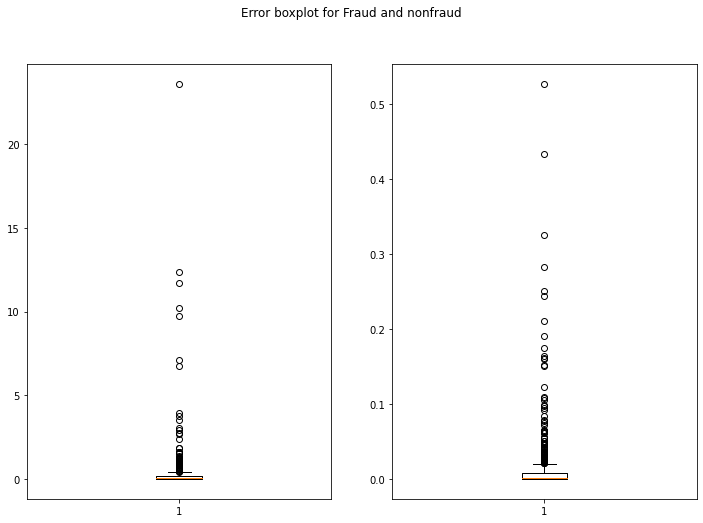

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

fig.suptitle('Error boxplot for Fraud and nonfraud')

## Setting threshold for metric calculations

In [ ]:
threshold = 0.250003411

## Testing on unseen data

In [ ]:
test_pred = autoencoder.predict(X_test)
test_pred.shape

38/38 [==============================] - 0s 1ms/step


(1188, 29)

In [ ]:
recon_error = np.abs(np.subtract(test_pred, X_test[:,:29]))
recon_error.shape 

(1188, 29)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score 

fraud = (recon_error[:,1]>threshold)
print(f'Recall = {recall_score(y_test, fraud)}')
print(f'Precision = {precision_score(y_test, fraud)}')
print(f'Accuracy = {accuracy_score(y_test, fraud)}')
print(f'F1-Score = {f1_score(y_test, fraud)}')

Recall = 0.6733167082294265
Precision = 0.8544303797468354
Accuracy = 0.851010101010101
F1-Score = 0.7531380753138075


In [ ]:
print(confusion_matrix(y_true=y_test,y_pred=fraud, labels=[1,0]))

[[270 131]
 [ 46 741]]


## Evaluation

In [ ]:
predictions_eval = autoencoder.predict(X_eval[:,:29])
predictions_eval.shape

10/10 [==============================] - 0s 2ms/step


(297, 29)

In [ ]:
ind_errors_eval = np.abs(np.subtract(predictions_eval, X_eval[:,:29]))
ind_errors_eval.shape

(297, 29)

In [ ]:
fraud_eval = ind_errors_eval[:,1]>threshold 
print(f'Recall = {recall_score(X_eval[:,29], fraud_eval)}')
print(f'Precision = {precision_score(X_eval[:,29], fraud_eval)}')
print(f'Accuracy = {accuracy_score(X_eval[:,29], fraud_eval)}')
print(f'F1-score = {f1_score(X_eval[:,29], fraud_eval)}')


Recall = 0.7523809523809524
Precision = 0.8586956521739131
Accuracy = 0.8686868686868687
F1-score = 0.802030456852792


In [ ]:
print(confusion_matrix(y_true=X_eval[:,29], y_pred=fraud_eval, labels=[1,0]))

[[ 79  26]
 [ 13 179]]


## Predict on unseen data

In [ ]:
predictions_unseen = autoencoder.predict(test_pca[:,:29])
predictions_unseen.shape

43/43 [==============================] - 0s 1ms/step


(1353, 29)

In [ ]:
ind_errors_unseen = np.abs(np.subtract(predictions_unseen, test_pca[:,:29]))
ind_errors_unseen.shape

(1353, 29)

In [ ]:
fraud_unseen = ind_errors_unseen[:,1]>threshold 
fraud_unseen.shape

(1353,)

In [ ]:
fraud_unseen[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False])

In [ ]:
pickle.dump(autoencoder, open('autoencoder_model.pkl', 'wb'))

## Adding two hidden layers to autoencoders

In [ ]:
train_pca.shape

(5410, 30)

In [ ]:
X_train_AE, X_test_AE = train_test_split(train_pca, test_size=0.2, random_state=2023)

X_train_AE = X_train_AE[X_train_AE[:,29]==0]
X_train_AE = X_train_AE[:,:-1] # dropping the last column 
y_test_AE = X_test_AE[:,29] 
X_test_AE = X_test_AE[:,:-1] # Dropping the last column 
#X_train_AE = X_train_AE.values 
#X_test_AE = X_test_AE.values 
X_train_AE.shape  

(3925, 29)

In [ ]:
y_test_AE.shape

(1082,)

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X_train_AE.shape[1] 
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
nb_epoch = 1000
batch_size = 16 

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model.h5',
                               verbose=0,
                               save_best_only=True) 
tensorboard = TensorBoard(log_dir='./logs', #Tensorboard 
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True) 
history = autoencoder.fit(X_train_AE, X_train_AE, 
                          epochs=nb_epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test_AE, X_test_AE),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
246/246 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.2071 - val_loss: 1.1935 - val_accuracy: 0.4612
Epoch 2/100
246/246 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.5712 - val_loss: 1.0761 - val_accuracy: 0.6137
Epoch 3/100
246/246 [==============================] - 1s 3ms/step - loss: 0.1646 - accuracy: 0.5954 - val_loss: 1.0116 - val_accuracy: 0.6275
Epoch 4/100
246/246 [==============================] - 1s 3ms/step - loss: 0.1524 - accuracy: 0.6028 - val_loss: 0.9649 - val_accuracy: 0.6442
Epoch 5/100
246/246 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.6392 - val_loss: 0.9240 - val_accuracy: 0.6701
Epoch 6/100
246/246 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.6596 - val_loss: 0.8906 - val_accuracy: 0.6747
Epoch 7/100
246/246 [==============================] - 1s 3ms/step - loss: 0.1307 - accuracy: 0.6762 - val_loss: 0.8594 - val_accuracy: 0.6848

In [ ]:
# Loading the model 
autoencoder = load_model('model.h5')

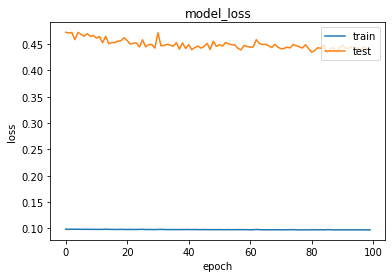

In [ ]:
# Plotting training and validation loss 

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model_loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
# Predicting on test and evaluate 

predictions = autoencoder.predict(X_test_AE) 
mse = np.mean(np.power(X_test_AE - predictions, 2), axis=1)
mse.shape
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test_AE}) 

error_df.describe()

34/34 [==============================] - 0s 1ms/step


,reconstruction_error,true_class
count,1082.000000,1082.000000
mean,0.432913,0.095194
std,3.738037,0.293619
min,0.004859,0.000000
25%,0.048194,0.000000
50%,0.097323,0.000000
75%,0.132201,0.000000
max,81.426433,1.000000


In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

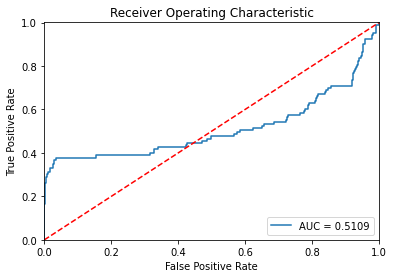

In [ ]:
###ROC for errors and true class

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

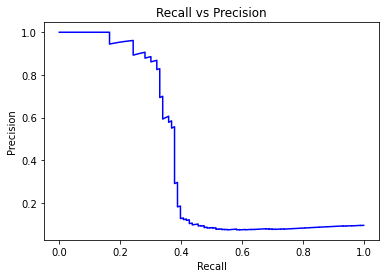

In [ ]:
## Recall Vs Precision

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

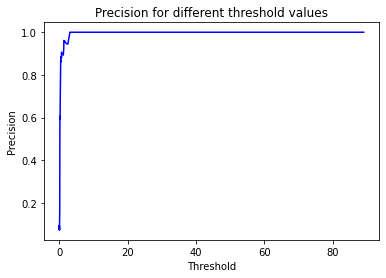

In [ ]:
#Threshold Vs Precision 
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()


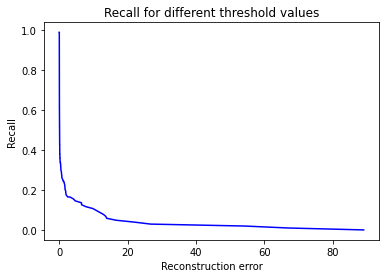

In [ ]:
##Recall vs Thresold
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [ ]:
threshold = 0.5

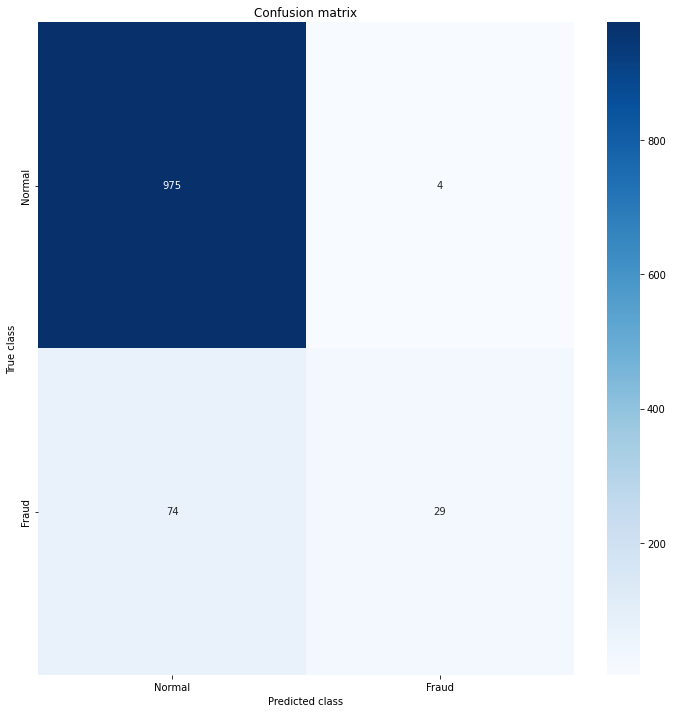

In [ ]:
LABELS = ["Normal", "Fraud"] 

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred,labels=[0,1])
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print('F1_Score:',f1_score(error_df.true_class, y_pred))          #--- Monika's F1_Score: 0.4264705882352941

F1_Score: 0.4264705882352941


# Summary

**We are able to achieve and F1-score of 0.7 on unseen data with an auto-encoder network of one dense layer and 100 epochs. Unfortunately a more sophisticated auto-encoder network of two dense layers does not yield improvement in performance. **